In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

# 1. 데이터 생성
- 남,여 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [20]:
random.randint(140, 195)

184

In [22]:
data = []
for i in range(50):
    # 여자 데이터 data추가
    data.append([random.randint(40, 70), random.randint(140, 170)])
    # 남자 데이터 data추가
    data.append([random.randint(60, 95), random.randint(160, 195)])
# data

In [23]:
# 여자
# for female in data[::2]:
#     print(female, end=' ')
print('여자 : ', [female for female in data[::2]])
print('남자 : ', [male for male in data[1::2]])
print('====================================================')
print('여자 몸무게(x축) :',  [female[0] for female in data[::2]] )
print('여자 키(y축) :',  [female[1] for female in data[::2]] )

print('남자 몸무게(x축) : ', [male[0] for male in data[1::2]])
print('남자 키(y축) : ', [male[1] for male in data[1::2]])

여자 :  [[44, 143], [41, 147], [67, 152], [47, 157], [45, 142], [69, 170], [42, 156], [46, 147], [58, 152], [67, 145], [63, 142], [41, 152], [43, 150], [56, 144], [59, 148], [50, 143], [69, 156], [51, 165], [55, 143], [44, 154], [41, 165], [66, 167], [62, 167], [46, 143], [59, 156], [53, 169], [70, 170], [54, 143], [65, 165], [49, 167], [45, 149], [62, 160], [55, 164], [70, 142], [41, 168], [62, 145], [62, 141], [68, 150], [56, 169], [48, 140], [43, 151], [52, 160], [65, 165], [67, 162], [56, 151], [50, 148], [70, 168], [56, 169], [63, 141], [58, 149]]
남자 :  [[68, 181], [95, 178], [66, 172], [63, 165], [79, 172], [66, 172], [65, 186], [84, 181], [62, 171], [68, 181], [82, 183], [64, 161], [86, 177], [65, 171], [89, 171], [75, 162], [80, 166], [94, 171], [86, 193], [70, 183], [78, 161], [62, 183], [75, 171], [94, 165], [83, 172], [74, 176], [87, 167], [61, 177], [95, 186], [81, 177], [92, 186], [60, 179], [93, 169], [66, 195], [86, 190], [75, 189], [74, 181], [82, 183], [77, 166], [76, 16

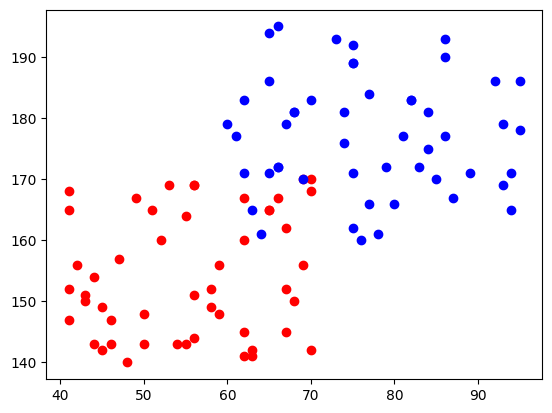

In [26]:
plt.plot([female[0] for female in data[::2]], 
        [female[1] for female in data[::2]], 'o', color='r')
plt.plot([male[0] for male in data[1::2]],
        [male[1] for male in data[1::2]], 'o', color='b')
plt.show()

# 2. 군집화 로직

In [27]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40,95), random.randint(140,195)],
    [random.randint(40,95), random.randint(140,195)]
]
random_points

[[46, 156], [69, 149]]

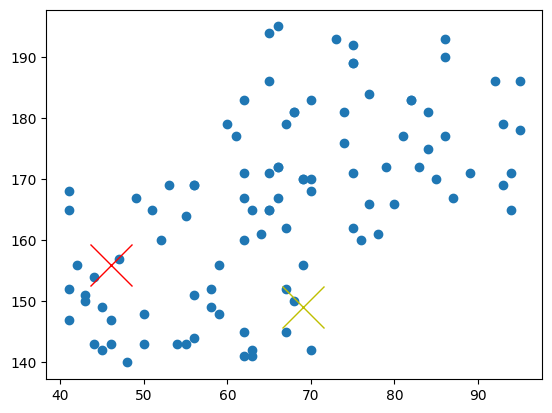

In [28]:
plt.plot( [d[0] for d in data] ,
         [d[1] for d in data], 'o')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=30) # 기준점0(random_points[0])
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='y', markersize=30) # 기준점1(random_points[1])    

In [32]:
# 두 점 거리를 return / a : [0,0]
def dist(a, b):
    return np.sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2 )
print(dist([3,4], [0,0]))
print(dist(random_points[0], data[0]))
print(dist(random_points[1], data[0]))

5.0
13.152946437965905
25.709920264364882


In [31]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(33, 67)

In [ ]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0], '0',color='r')
         [d[1]]

In [33]:
# 기준점 이동 : group0의 중심점(기준점0), group1의 중심점(기준점1)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]
random_points

[[50.90909090909091, 160.5151515151515],
 [73.61194029850746, 168.2089552238806]]

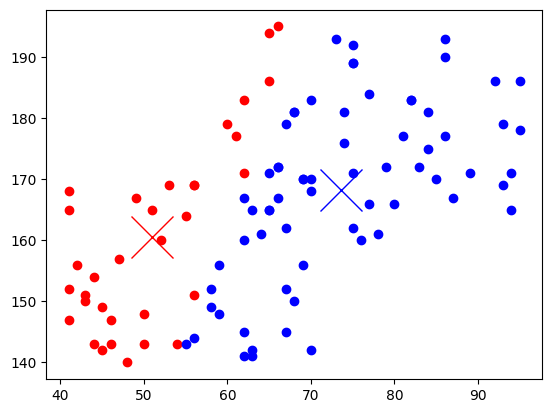

In [34]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b')
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=30)

# 군집화 전체 코드(for문 이용)
- 랜덤 포인트  2개 지정
- 랜덤포인트 2개 시각화(x)
- for 문
--랜덤포인트 2지점 기준으로 group0과 group1 나눔
--랜덤 포인트 출력
--group0의 중간점과 group1의 중간점을 랜덤포인트로 업데이트
--랜덤 포인트 출력과 시각화

초기 기준점 : [[80, 146], [69, 187]]
1 번째 points : [[60.44444444444444, 152.26666666666668], [70.76363636363637, 176.63636363636363]]
2 번째 points : [[54.43181818181818, 152.0], [75.30357142857143, 176.41071428571428]]
3 번째 points : [[54.022222222222226, 152.57777777777778], [76.01818181818182, 176.38181818181818]]
4 번째 points : [[54.19565217391305, 152.8913043478261], [76.27777777777777, 176.55555555555554]]
5 번째 points : [[54.19565217391305, 152.8913043478261], [76.27777777777777, 176.55555555555554]]
6 번째 points : [[54.19565217391305, 152.8913043478261], [76.27777777777777, 176.55555555555554]]
7 번째 points : [[54.19565217391305, 152.8913043478261], [76.27777777777777, 176.55555555555554]]
8 번째 points : [[54.19565217391305, 152.8913043478261], [76.27777777777777, 176.55555555555554]]
9 번째 points : [[54.19565217391305, 152.8913043478261], [76.27777777777777, 176.55555555555554]]


(140.0, 195.0)

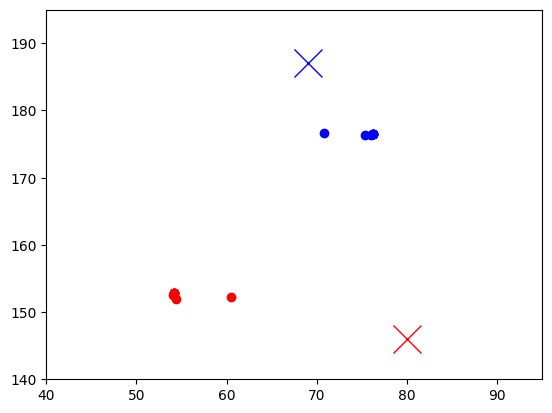

In [35]:
points = [
    [random.randint(40, 95), random.randint(140,195)],
    [random.randint(40, 95), random.randint(140,195)],
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)
for i in range(1, 10):
    # 포인트 2지점 기준으로 group0과 group1나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
        
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X, group0_mean_Y]
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X, group1_mean_Y]
    
    # 포인트 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1], 'o', color='r')
    plt.plot(points[1][0], points[1][1], 'o', color='b')
plt.xlim([40,95])
plt.ylim([140,195])

초기 기준점 : [[64, 159], [80, 174]]
1 번째 points : [[56.724137931034484, 156.24137931034483], [79.0952380952381, 178.6904761904762]]
2 번째 points : [[55.02, 154.02], [77.22, 177.32]]
3 번째 points : [[54.645833333333336, 153.39583333333334], [76.71153846153847, 177.0]]
4 번째 points : [[54.645833333333336, 153.39583333333334], [76.71153846153847, 177.0]]
5 번째 points : [[54.645833333333336, 153.39583333333334], [76.71153846153847, 177.0]]
6 번째 points : [[54.645833333333336, 153.39583333333334], [76.71153846153847, 177.0]]
7 번째 points : [[54.645833333333336, 153.39583333333334], [76.71153846153847, 177.0]]
8 번째 points : [[54.645833333333336, 153.39583333333334], [76.71153846153847, 177.0]]
9 번째 points : [[54.645833333333336, 153.39583333333334], [76.71153846153847, 177.0]]


(140.0, 195.0)

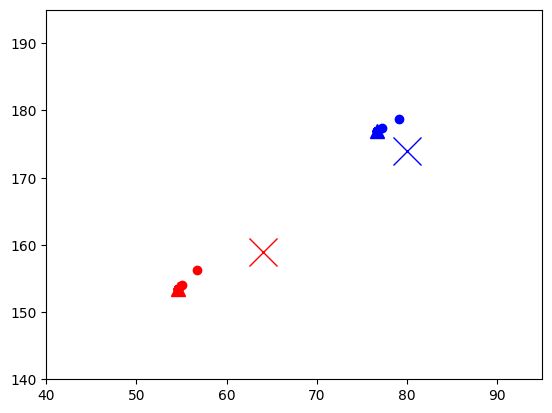

In [36]:
points = [
    [random.randint(40, 95), random.randint(140,195)],
    [random.randint(40, 95), random.randint(140,195)],
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)
for i in range(1, 10):
    # 포인트 2지점 기준으로 group0과 group1나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
        
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X, group0_mean_Y]
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X, group1_mean_Y]
    
    # 포인트 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1], 'o', color='r')
    plt.plot(points[1][0], points[1][1], 'o', color='b')

plt.plot(points[0][0], points[0][1], '^', color='r', markersize=10)
plt.plot(points[1][0], points[1][1], '^', color='b', markersize=10)
plt.xlim([40,95])
plt.ylim([140,195])

초기 기준점 : [[91, 186], [81, 169]]
1 번째 points : [[81.3125, 187.1875], [63.226190476190474, 161.57142857142858]]
2 번째 points : [[80.11428571428571, 180.88571428571427], [58.58461538461538, 157.47692307692307]]
3 번째 points : [[78.25581395348837, 179.06976744186048], [56.96491228070175, 155.56140350877192]]
4 번째 points : [[77.22, 177.32], [55.02, 154.02]]
5 번째 points : [[76.71153846153847, 177.0], [54.645833333333336, 153.39583333333334]]
6 번째 points : [[76.71153846153847, 177.0], [54.645833333333336, 153.39583333333334]]
7 번째 points : [[76.71153846153847, 177.0], [54.645833333333336, 153.39583333333334]]
8 번째 points : [[76.71153846153847, 177.0], [54.645833333333336, 153.39583333333334]]
9 번째 points : [[76.71153846153847, 177.0], [54.645833333333336, 153.39583333333334]]


(140.0, 195.0)

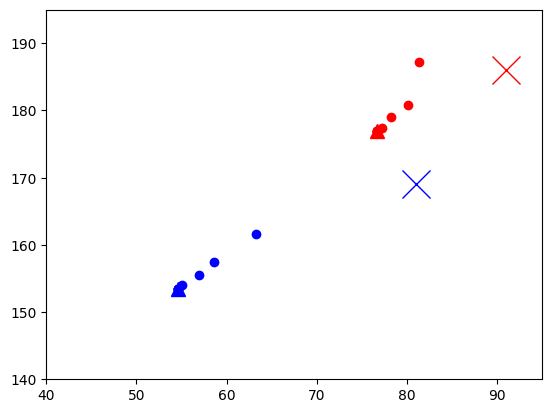

In [37]:
points = [
    [random.randint(40, 95), random.randint(140,195)],
    [random.randint(40, 95), random.randint(140,195)],
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)
for i in range(1, 10):
    # 포인트 2지점 기준으로 group0과 group1나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
        
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X, group0_mean_Y]
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X, group1_mean_Y]
    
    # 포인트 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1], 'o', color='r')
    plt.plot(points[1][0], points[1][1], 'o', color='b')

plt.plot(points[0][0], points[0][1], '^', color='r', markersize=10)
plt.plot(points[1][0], points[1][1], '^', color='b', markersize=10)
plt.xlim([40,95])
plt.ylim([140,195])

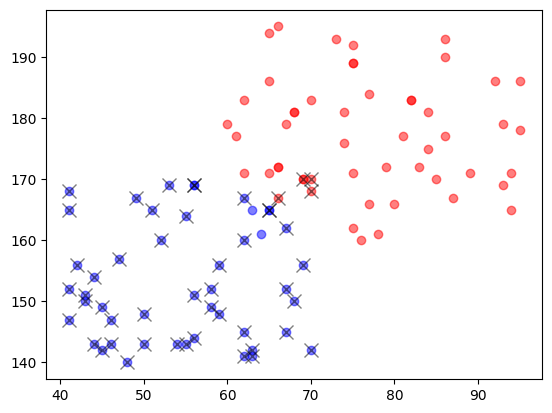

In [38]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)

# 4.api(sklearn)를 이용한 군집화
- sklearn: 머신러닝 패키지
  * 예측 모델: 분류, 회귀, 군집분석 -fit(학습), predict(예측)
  * 변환 모델: 전처리시 사용 ex.인코딩, 스케일 조정 - fit(학습), transform(변환함수), fit-transform(학->변)

In [42]:
# 군집분석 라이브러리가 경고 메세지(joblib 충돌) 출력할 경우
# import os
# os.environ['OMP_NUM_THREADS'] = '1'

In [41]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2, # 2개 그룹으로 군집
            init='random', # 초기 기준점을 random하게
            n_init=10, # 10번 실행
            random_state=7) # random 결과를 일관적으로 맞취기 위한 seed
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [43]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2, # 2개 그룹으로 군집
              init='random', # 초기 기준점을 random하게
              n_init=10,     # 10번 실행
              random_state=7) # random 결과를 일관적으로 맞추기 위한 seed
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [44]:
# 기준점(중심점)
model.cluster_centers_

array([[ 76.71153846, 177.        ],
       [ 54.64583333, 153.39583333]])

In [45]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [46]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]

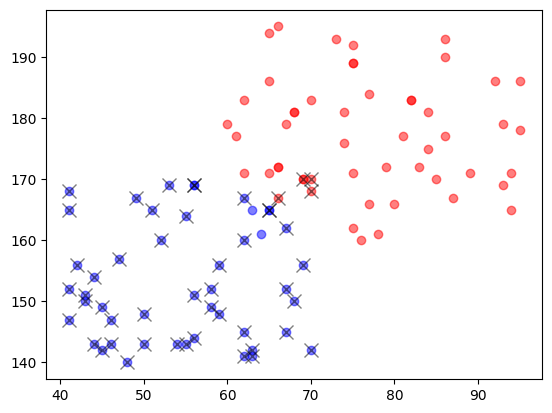

In [47]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)